# 합성곱과 풀링(Convolution and Pooling)

CONV : 합성곱 연산  
ReLU : 합성곱 연산의 결과가 활성화 함수 ReLU 를 지남
CONV,RELU 두 과정을 합성곱층이라고 함


### 채널(Channel)

이미지는 (높이,너비,채널) 이라는 3차원 텐서  
채널은 때로는 깊이(depth) 라고도 함  
높이는 이미지의 세로 방향 픽셀 수, 너비는 이미지의 가로 방향 픽셀 수, 채널은 색 성분을 의미  
흑백 이미지:  채널 수 0 
컬러 이미지:  채널 수 3 ( Red,Green,Blue ) 
각 픽셀은 0부터 255 사이의 값을 가짐  

### 합성곱 연산(Convolution operation)

합성곱층: 합성곱 연산을 통해서 이미지의 특징을 추출하는 역할
특성 맵(feature map) : 입력으로부터 커널을 사용해 합성곱 연산을 통해 나온 결과  
스트라이드(stride) : 커널의 이동범위
- 커널(kernel) 또는 필터(filter)라는 n×m 크기의 행렬로 높이(height)×너비(width) 크기의 이미지를 처음부터 끝까지 겹치며 훑으면서 n×m크기의 겹쳐지는 부분의 각 이미지와 커널의 원소의 값을 곱해서 모두 더한 값을 출력  
- 커널(kernel)은 일반적으로 3 × 3 또는 5 × 5를 사용. 크기는 사용자가 정할 수 있음  
- 스트라이드도 사용자가 정할 수 있음

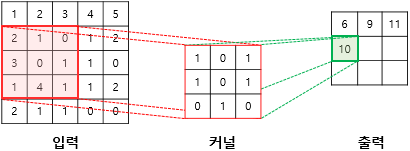

###  3차원 텐서의 합성곱 연산 

실제로 합성곱 연산의 입력은 다수의 채널을 가진 이미지 또는 이전 연산의 결과로 나온 특정맵일 수 있음  
다수의 채널을 가진 입력 데이터를 가지고 합성곱 연산을 한다면 커널의 채널 수도 입력의 채널 수만큼 존재  
입력 데이터의 커널 수 = 커널의 채널 수  
채널 수가 같으므로 합성곱 연산을 채널마다 수행  
그 결과를 모두 더해 최종 **특성 맵** 얻음  
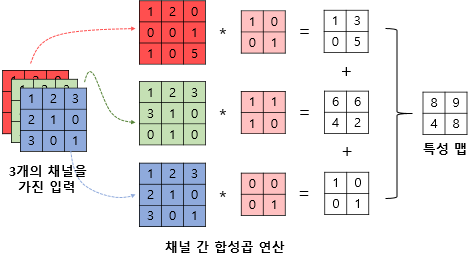 

3개의 채널을 가진 입력 데이터와 3개의 채널을 가진 1개의 커널의 합성곱 연산  
커널의 각 채널끼리는 크기가 같음  
각 채널 간 합성곱 연산을 마치고 그 결과를 모두 더해 하나의 채널을 가지는 특성 맵을 만듬  


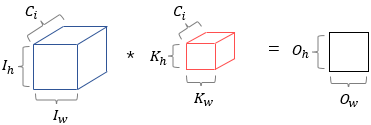 

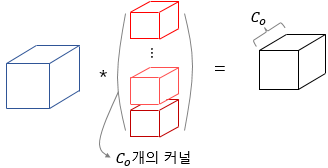 

하나의 커널이 가지는 매개변수의 수는 Ki × Ko × Ci  
가중치 매개변수의 총 수 : Ki × Ko × Ci × Co (커널이 총 Co개)  

### 특성 맵의 크기 계산 방법 
```
Ih : 입력의 높이
Iw : 입력의 너비
Kh : 커널의 높이
Kw : 커널의 너비
S : 스트라이드
Oh : 특성 맵의 높이
Ow : 특성 맵의 너비
```
패딩의 폭을 P 라 하고 패딩까지 고려한 식
```
Oh=floor((Ih−Kh+2P)/S+1)
 
Ow=floor((Iw−Kw+2P)/S+1)
```
### 크기 보존 

스트라이드가 1 이라면  
3x3 크기의 커널을 사용하고 1폭짜리 제로 패딩을 사용하면 크기 보존  
5x5 크기의 커널을 사용하고 2폭짜리 제로 패딩을 사용하면 크기 보존



### 풀링(Pooling) 
풀링 연산 : 특성 맵을 다운샘플링하여 크기를 줄임  
풀링 연산에는 다음을 사용  
최대풀링 : max pooling 
- 겹치는 영역 안에서 최대값을 추출
평균풀링 : average pooling 
- 겹치는 영역 안에서 평균값을 추출

합성곱 연산과의 차이점은 학습해야 할 가중치가 없으며 연산 후 채널 수가 변하지 않음 


스트라이드가 2 일때 2x2 크기 커널로 맥스 풀링 연산을 했을 때 특성맵이 절반의 크기로 다운샘플링 

In [8]:
import torch
import torch.nn as nn
# 1x 1x 28 x28 크기 텐서 선언  
inputs = torch.Tensor(1,1,28,28)

print('텐서의 크기 : {}'.format(inputs.shape))

# 1채널 입력, 32채널 뽑아냄, 커널사이즈3, 패딩1 
conv1 = nn.Conv2d(1, 32, 3, padding=1)
# Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) 
print(conv1)

# 32채널 입력, 64채널 뽑아냄, 커널사이즈3, 패딩1 
conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
print(conv2)

# 정수 인자 하나를 넣으면 커널 사이즈와 스트라이드가 둘 다 해당값으로 지정 
# 커널 2 스트라이드2 
pool = nn.MaxPool2d(2)
print(pool)


out = conv1(inputs)
print(out.shape) 
# 배치 크기 x 채널 x 높이 x 너비  
# torch.Size([1, 32, 28, 28]) 
# (28-3+2/1 + 1) = 28 

# 맥스풀링을 통과시킴 
out = pool(out)
print(out.shape) 
# torch.Size([1, 32, 14, 14]) 


conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
print(conv2)

# 두 번째 합성곱층에 통과 
out = conv2(out)
print(out.shape) 

# 다시 맥스풀링 통과 
out = pool(out)
print(out.shape) 
# torch.Size([1, 64, 7, 7]) 
# 각 차원 출력해보기
print(out.size(0),out.size(1),out.size(2),out.size(3))

# view()를 사용하여 텐서를 펼침
# 배치 차원을 제외하고 모두 하나의 차원으로 통합
out = out.view(out.size(0), -1) 
print(out.shape) 

# 결합층(Fully-Connteced layer)를 통과 
# 출력층으로 10개의 뉴런을 배치하여 10개 차원의 텐서로 변환 
fc = nn.Linear(3136, 10) # input_dim = 3,136, output_dim = 10
out = fc(out)
print(out.shape) 



텐서의 크기 : torch.Size([1, 1, 28, 28])
Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
torch.Size([1, 32, 28, 28])
torch.Size([1, 32, 14, 14])
Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
torch.Size([1, 64, 14, 14])
torch.Size([1, 64, 7, 7])
1 64 7 7
torch.Size([1, 3136])
torch.Size([1, 10])


In [9]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 랜덤 시드 고정
torch.manual_seed(777)

# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(777)
    
    
learning_rate = 0.001
training_epochs = 15
batch_size = 100

mnist_train = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                          train=True, # True를 지정하면 훈련 데이터로 다운로드
                          transform=transforms.ToTensor(), # 텐서로 변환
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                         train=False, # False를 지정하면 테스트 데이터로 다운로드
                         transform=transforms.ToTensor(), # 텐서로 변환
                         download=True)

data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        # 첫번째층
        # ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 32)
        #    Pool     -> (?, 14, 14, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # 두번째층
        # ImgIn shape=(?, 14, 14, 32)
        #    Conv      ->(?, 14, 14, 64)
        #    Pool      ->(?, 7, 7, 64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # 전결합층 7x7x64 inputs -> 10 outputs
        self.fc = torch.nn.Linear(7 * 7 * 64, 10, bias=True)

        # 전결합층 한정으로 가중치 초기화
        torch.nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)   # 전결합층을 위해서 Flatten
        out = self.fc(out)
        return out

    
# CNN 모델 정의
model = CNN().to(device) 

criterion = torch.nn.CrossEntropyLoss().to(device)    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

total_batch = len(data_loader)
print('총 배치의 수 : {}'.format(total_batch)) 

for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y느 ㄴ레이블.
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Processing...
Done!


/home/ywoosang/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1616554793803/work/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


총 배치의 수 : 600
[Epoch:    1] cost = 0.22013016
[Epoch:    2] cost = 0.060841918
[Epoch:    3] cost = 0.0460043363
[Epoch:    4] cost = 0.0366912633
[Epoch:    5] cost = 0.0300827809
[Epoch:    6] cost = 0.026076043
[Epoch:    7] cost = 0.0207482558
[Epoch:    8] cost = 0.0185081456
[Epoch:    9] cost = 0.0156298671
[Epoch:   10] cost = 0.0132493647
[Epoch:   11] cost = 0.0116032409
[Epoch:   12] cost = 0.00885804463
[Epoch:   13] cost = 0.00786661264
[Epoch:   14] cost = 0.00661786692
[Epoch:   15] cost = 0.00723177893


In [10]:
# 학습을 진행하지 않을 것이므로 torch.no_grad()
with torch.no_grad():
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

Accuracy: 0.9847999811172485


/home/ywoosang/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/ywoosang/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")
